# Dérivée d'une fonction

## Présentation de l'activité
- **Niveau de classe :** 
 - Classe de première de la voie générale (spécialité mathématiques).
 - Classe de première de la voie technologique (tronc commun).
- **Références aux programmes :**
 - Spécialité de première générale : *écrire la liste des coefficients directeurs des sécantes pour un pas donné.*
 - Enseignement commun de première technologique : *à l'aide d'un logiciel, visualiser la position limite des sécantes à une courbe en un point.*
- **Description :** 
 Activité d'introduction de la notion de dérivée en distinguant le point de vue local (nombre dérivé) et le point de vue global (fonction  dérivée).

## Nombre dérivé d'une fonction en un point



##### Définition
Le nombre dérivé d’une fonction $f$ en un point $x_0$ est la limite (lorsqu'elle existe) du taux de variation de $f$ en ce point.
C'est la limite de la pente des sécantes issues du point de la courbe d'abscisse $x_0$ :
$$ \lim _{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}=f'(x_0).$$

### Pente d'une sécante en un point
La fonction `coefDirSecante` calcule la pente de la sécante à la courbe représentative d'une fonction $f$ préalablement définie (ci-dessous la fonction carré) entre le point d'abscisse $x_0$ et le point d'abscisse $x_0+h$.

In [1]:
def f(x):
     return x**2

def coefDirSecante(x0,h):
  coef=(f(x0+h)-f(x0))/h
  return coef

coefDirSecante(1,0.1)

2.100000000000002

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme**

  Que représentent les paramètres de la fonction `coefDirSecante` ?
 
*  **Écrire un programme**
 
  - Modifier le contenu de la fonction `f`. 
  - Écrire la fonction `coefDirSecante`.
 
* **Tester** la fonction `coefDirSecante` pour $x_0=1$ et pour de petites valeurs de $h$. 

 En déduire une valeur approchée de $f'(1)$ où $f$ désigne la fonction carré.



**Sécante passant par les points $(x_0, f(x_0))$ et $(x_0+h,f(x_0+h))$**

On cherche à tracer la sécante à la courbe représentative de la fonction $f$ passant par les points d'abscisses $x_0$ et $x_0+h$. La fonction `secante` prend en paramètres les deux nombres flottants $x_0$ et $h$, et renvoie les listes  $[x_0,x_0+h]$ et $[f(x_0),f(x_0+h)]$ afin de tracer la sécante avec `matplotlib`.

In [2]:
def secante(x0,h):
  return [x0,x0+h],[f(x0),f(x0+h)]

secante(1,0.1)

([1, 1.1], [1, 1.2100000000000002])

**Liste des coefficients directeurs de sécantes en un point**

On souhaite afficher la liste des pentes des sécantes à la courbe représentative de la fonction $f$ passant par les points d'abscisse $x_0$ et $x_0+h$ pour des valeurs de $h$ tendant vers $0$. 

In [3]:
def listeCoefDir(n):
    liste = [1-i/n for i in range(n)]
    x_0=1
    return [coefDirSecante(x_0,h) for h in liste]

listeCoefDir(10)

[3.0,
 2.9,
 2.8000000000000003,
 2.6999999999999997,
 2.600000000000001,
 2.5,
 2.399999999999999,
 2.3000000000000003,
 2.2,
 2.1000000000000023]

**Représentations graphiques** 


**Tracé d'une sécante en un point**

Dans cette partie, on trace la sécante à la courbe de la fonction $f$ entre le point d'abscisse $1$
  et le point d'abscisse $1+h$.
 

**Importation de la bibliothèque graphique**

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

**Fonction renvoyant la liste des éléments de la subdivision d'un intervalle $[a,b]$ en $N$ sous-intervalles de même longueur**

 Le nom de la fonction est `subdivisionIntervalle`.
 
 Elle prend comme paramètres :
 
 * les bornes $a$ et $b$ de l'intervalle $[a,b]$
 
 * le nombre $N$ de sous-intervalles de la subdivision 

Elle renvoie la liste des éléments de la subdivision.

N.B : on considère ici des subdivisions à pas constant.

In [5]:
def subdivisionIntervalle(a,b,N):
    pas = (b-a)/N
    return [a+i*pas for i in range(N+1)]

<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Expliquer un programme**

 Le programme précédent étant fourni, demander aux élèves d'expliquer : 
 - à quoi correspond la variable `pas` et comment elle est calculée ; 
 - l'instruction de la ligne 3 ;
 - quel est le premier élément de la liste renvoyée ;
 - quel est le dernier élément de la liste renvoyée.
 
* **Compléter un programme** 
 - Le programme précédent étant fourni en remplaçant la ligne 2 par `pas= ...`, demander aux élèves de compléter la ligne 2.
 - Le programme précédent étant fourni en remplaçant la ligne 3 par `[... for i in range(N+1)]`, demander aux élèves de compléter la ligne 3.
 
* **Tester un programme**

 Tester la fonction `subdivisionIntervalle` sur l'intervalle $[1,8]$ subdivisé en 8 parties égales.

**Représentation graphique de la fonction $f$ et tracé d'une sécante**

Le programme ci-dessous est séparé en trois parties :
- les constantes (modifiables par l'enseignant) ;
- les listes contenant les abscisses et les ordonnées des points de la courbe ;
- les instructions de représentation graphique.

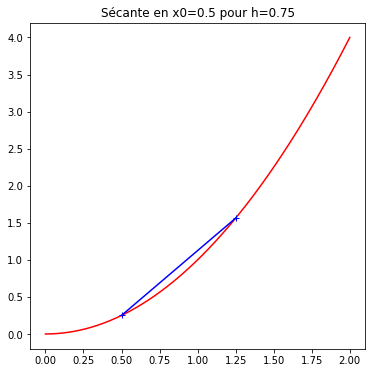

In [6]:
# constantes
a = 0
b = 2
h =0.75
x0 = 0.5
nbSubdivision = 1000

# points de la courbe
abscisses = subdivisionIntervalle(a,b,nbSubdivision)
ordonnees = [f(x) for x in abscisses]
abscisseSecante,ordonneeSecante = secante(x0,h)

# paramètres figure
fig, ax1 = plt.subplots(1,figsize=(6, 6))
ax1.plot(abscisses,ordonnees,'r')
ax1.plot(abscisseSecante,ordonneeSecante,'b+-')
ax1.set_title('Sécante en x0={} pour h={}'.format(x0,h,coefDirSecante(1,h)))
plt.show()

### Animation susceptible d'être présentée aux élèves 
Le programme suivant permet de créer deux  animations parallèles : la première illustre la convergence des sécantes issues du point d'abscisse $1$ vers la tangente en ce point et la seconde illustre la convergence de la pente de ces sécantes vers le nombre dérivé. L'animation peut être utilisée telle quelle en classe par l'enseignant. Il peut aussi, s'il le souhaite, modifier les constantes pour changer l'animation. La compréhension et la connaissance de ce progamme ne sont pas attendues des élèves.

In [7]:
%matplotlib inline
import matplotlib.animation
from IPython.display import HTML

# constantes
a = 0
b = 2
nbSubdivision =1000
x0 = 1
n =30

# points de la courbe
abscisses = subdivisionIntervalle(a,b,nbSubdivision)
ordonnees = [f(x) for x in abscisses]

#Création des figures
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
ax1.plot(abscisses,ordonnees,'r')
courbeSegments, = ax1.plot([],[],'.-',color="#1e7fcb")
courbeConvergence, = ax2.plot([],[],color="#1e7fcb")

#Réglage des axes
ax1.set_xlim(( x0-1, x0+1))
ax1.set_ylim(((x0-1)**2, (x0+1)**2))
ax2.set_xlim(( 0, n))
ax2.set_ylim((2*x0-0.2, 2*x0+1))
pentes=[]

# initialisation
def init():
  global courbeSegments,courbeConvergence
  courbeSegments.set_data([], [])
  courbeConvergence.set_data([], [])
  return (courbeSegments,) 

# fonction d'animation
def animate(i):
    global courbeSegments,courbeConvergence
    #Calcul de h
    h=1/(i+1)
    #Nouvelles extrémités de la sécante
    abscisseSecante,ordonneeSecante = secante(x0,h)
    #Tracé de la sécante
    courbeSegments.set_data(abscisseSecante,ordonneeSecante)
    #Ajout de la pente à la liste des pentes  
    pentes.append(coefDirSecante(x0,h))
    #Tracé de la courbe des pentes
    courbeConvergence.set_data(range(1,i+2),pentes[:i+2])
    # Titre de la figure 1
    ax1.set_title('Sécante pour $x_0$={:.2f} et h={:.2f}'.format(x0,h))
    #Ajout du tracé de la tangente et de la valeur limite de la dérivée lorsque h<0.1
    if i>10:
        ax1.plot([x0-1+1/(2*x0),x0+1],[(x0-1)**2,2*x0+x0**2],color="#47255f")
        ax2.plot([0,n],[2*x0,2*x0],color="#47255f")
    ax2.set_title('Pente de la sécante $\simeq${:.2f}'.format(pentes[-1]))
    return (courbeSegments,)

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=False,interval=500)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

## Fonction dérivée
La fonction qui, à tout réel $x$, associe le nombre dérivé de $f$ en $x$ est
la fonction dérivée de $f$ et se note $f'$.

### Approximation de la fonction dérivée par la liste des coefficients directeurs des sécantes.
La fonction suivante, nommée `listeCoefDir`, renvoie la liste des coefficients directeurs des sécantes à la courbe de la fonction $f$ sur l'intervalle $[0;2]$ pour une subdivision de cet intervalle en $n$ sous-intervalles de même longueur. Elle prend en paramètre ce nombre $n$.

In [8]:
## Alternative en utilisant la fonction subdivisionIntervalle ##
def listeCoefDir(n):
    abscisses = subdivisionIntervalle(0,2,n)
    h=2/n
    return [coefDirSecante(x,h) for x in abscisses]

print(listeCoefDir(10)) 

[0.20000000000000004, 0.6000000000000001, 1.0000000000000002, 1.4000000000000001, 1.7999999999999994, 2.1999999999999997, 2.6, 3.0000000000000004, 3.3999999999999986, 3.799999999999999, 4.200000000000004]


<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Compléter un programme** 

 Remplacer les lignes 4 et 5 du programme précédent par `h=...` et `return [... for x in abscisses]` et demander aux élèves de les compléter.
* **Expliquer un programme** 

 Le programme précédent étant fourni, demander aux élèves d'expliquer :
 - l'instruction de la ligne 5 ;
 - le nombre d'éléments contenus dans la liste de la ligne 5.
 
* **Tester un programme**

Tester la fonction `ListeCoefDir` pour $n=10$ (remplacer la ligne 7 par `...` dans le programme fourni aux élèves).


### Courbe approchée de la fonction dérivée.
Le programme suivant trace une courbe approchée de la fonction dérivée de la fonction carré sur l'intervalle  $[0;2]$ subdivisé en $n$ sous-intervalles. L'ordonnée du point d'abscisse $x$ de cette courbe est égale au taux de variation (pente de la sécante) de la fonction carré entre $x$ et $x+\dfrac{2}{n}$. La courbe approchée est la droite d'équation $y=2x+\dfrac{2}{n}$.

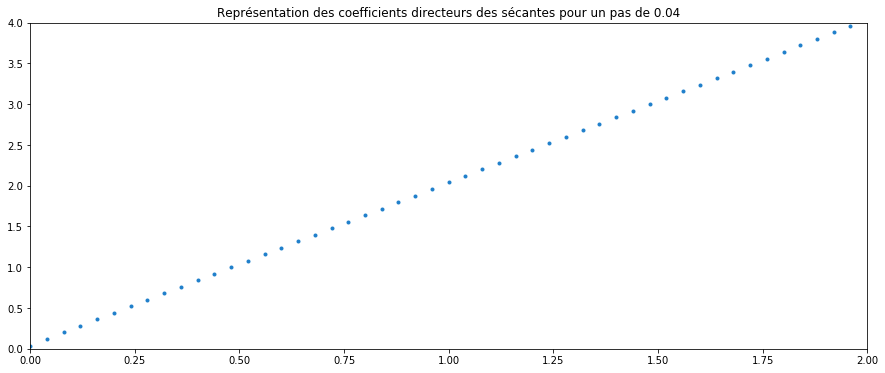

In [9]:
%matplotlib inline
n=50
abscisses = subdivisionIntervalle(0,2,n)
ordonnees = listeCoefDir(n)

#paramètres figure
fig, ax1 = plt.subplots(1,figsize=(15, 6))
ax1.plot(abscisses,ordonnees,'.', color="#1e7fcb")
ax1.set_xlim(( 0, 2))
ax1.set_ylim((0, 4))
ax1.set_title('Représentation des coefficients directeurs des sécantes pour un pas de {:.2f}'.format(2/n))
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Tester** le programme pour différentes valeurs de $n$.
* **Observer** l'allure de la courbe de la fonction dérivée.
* **Conjecturer** l'expression de $f'$ en prenant des valeurs assez grandes pour $n$.

### Animation susceptible d'être présentée aux élèves
L'animation suivante permet de visualiser une approximation de la courbe de la dérivée de la fonction carré.
Pour chaque valeur de $h$, le point d'abscisse $x$ de la courbe approchée a pour ordonnée la pente de la sécante, à savoir $\dfrac{(x+h)^2-x^2}{h}=2x+h$. Cela fournit une famille de droites qui tendent vers la droite d'équation $y=2x$ lorsque le pas $h$ tend vers $0$. Ici le pas $h$ est la longueur d'une subdivision de l'intervalle.


In [10]:
%matplotlib inline
#ctes: 
n =60
#Création des figures
fig, ax1 = plt.subplots(1, 1,figsize=(6, 12))
courbePenteSecantes, = ax1.plot([],[],'.',color="#1e7fcb")
#Réglage des axes
ax1.set_xlim(( 0, 2))
ax1.set_ylim((0, 4))

def init():
    global courbePenteSecantes
    courbePenteSecantes.set_data([], [])
    return (courbeSegments,) 

def animate(i):
    global courbePenteSecantes
    abscisses = subdivisionIntervalle(0,2,i+1)
    ordonnees=listeCoefDir(i+1)
    #Tracé de la courbe des pentes de sécantes
    courbePenteSecantes.set_data(abscisses,ordonnees)
  
  # Titre de la figure 1
    #Calcul de h
    h=1/(i+1)
    ax1.set_title('Courbe des pentes des sécantes de la fonction carrée pour  h={:.2f}'.format(h))
    return (courbePenteSecantes,)
  

#plt.show()
plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=False,interval=200)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

## Pour aller plus loin : dérivation de la fonction cube
En changeant la définition de la fonction $f$, on peut étudier de la même manière le nombre dérivé en un point et la fonction dérivée d'autres fonctions, par exemple de la fonction cube. 

### Pente d'une sécante

In [11]:
def cube(x):
    return x**3
def coefDirSecanteCube(a,h):
    coef=(cube(a+h)-cube(a))/h
    return coef
print(coefDirSecante(1,0.1))

2.100000000000002


### Fonction dérivée de la fonction cube
La fonction suivante, nommée `listeCoefDir`, renvoie la liste des coefficients directeurs des sécantes à la courbe de la fonction cube aux points de cette courbe correspondant à une subdivision de l'intervalle $[-2;2]$ en $n$ sous-intervalles de même longueur. Elle prend en paramètre ce nombre $n$.

In [12]:
def listeCoefDirCube(n):
    abscisse = subdivisionIntervalle(-2,2,n)
    h=4/n
    return [coefDirSecanteCube(x,h) for x in abscisse]

print(listeCoefDirCube(10)) 

[9.759999999999996, 5.920000000000001, 3.039999999999999, 1.1199999999999994, 0.1599999999999999, 0.16000000000000003, 1.1200000000000012, 3.0400000000000005, 5.920000000000001, 9.759999999999996, 14.559999999999995]


### Représentation de la liste des coefficients directeurs des sécantes pour un pas donné

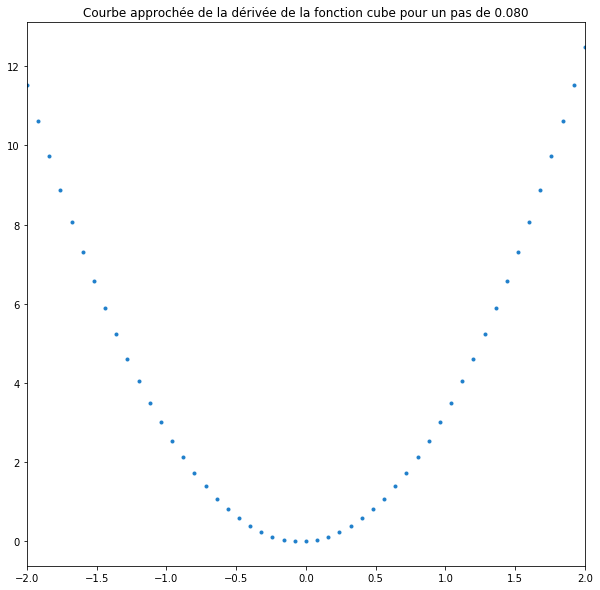

In [13]:
%matplotlib inline
n=50

abscisse = subdivisionIntervalle(-2,2,n)
ordonnee=listeCoefDirCube(n)

#paramètres figure
fig, ax1 = plt.subplots(1,figsize=(10, 10))
ax1.plot(abscisse,ordonnee,'.', color="#1e7fcb")
ax1.set_xlim(( -2, 2))
ax1.set_title('Courbe approchée de la dérivée de la fonction cube pour un pas de {:.3f}'.format(4/n))
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques

</div>

* **Tester** le programme pour différentes valeurs de $n$.
* **Observer** l'allure de la courbe de la fonction dérivée.
* **Conjecturer** la formule de $f'$ en prenant des valeurs assez grandes pour $n$.

### Animation susceptible d'être présentée aux élèves
L'animation suivante est une version dynamique de ce qui précède.

In [14]:
%matplotlib inline
#constantes: 
n =50
#Création des figures
fig, ax1 = plt.subplots(1, 1,figsize=(6, 12))
courbePenteSecantesCube, = ax1.plot([],[],'.',color="#1e7fcb")
#Réglage des axes
ax1.set_xlim(( -2, 2))
ax1.set_ylim(( 0, 12))

pentes=[]
def init():
    global courbePenteSecantesCube
    courbePenteSecantesCube.set_data([], [])
    return (courbePenteSecantesCube,) 

def animate(i):
    global courbePenteSecantesCube
    
    #Calcul des pentes de sécante
    abscisse = subdivisionIntervalle(-2,2,i+1)
    ordonnee=listeCoefDirCube(i+1) 
    
    #Tracé de la courbe des pentes de sécantes
    courbePenteSecantesCube.set_data(abscisse,ordonnee)
    # Titre de la figure 1
    #Calcul de h
    h=4/(i+1)
    ax1.set_title('Courbe des pentes de sécantes de la fonction cube pour  h={:.2f}'.format(h))
    return (courbePenteSecantesCube,)

plt.close()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=False,interval=200)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())